In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scikit-learn

In [ ]:
# Import  necessary libararies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
RANDOM_STATE = np.random.seed(15)

# Load the Winsconsin dataset from scikit-learn.
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Checking to see if data needs to be cleaned up


In [ ]:
cancer_df.describe(include='all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Checking to see if there is incomplete information. If there are it may result in inaccurate results

In [ ]:
missing_values=cancer_df.isnull().sum()
percent_missing = cancer_df.isnull().sum()/cancer_df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
mean radius,0,0.0
mean texture,0,0.0
mean perimeter,0,0.0
mean area,0,0.0
mean smoothness,0,0.0
mean compactness,0,0.0
mean concavity,0,0.0
mean concave points,0,0.0
mean symmetry,0,0.0
mean fractal dimension,0,0.0


### All the features to be used in the kNN model

In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Number of Malignant (target 1) and number of Benign (target 0)

In [ ]:
cancer_df.target.value_counts()

,count
target,
1,357
0,212


### Train test split on the data and getting it ready for model training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = cancer_df.drop('target', axis=1)
y = cancer_df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = RANDOM_STATE)


## Applying KNN Classifier

### Intial k = 1 and finding accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_model_fitting(X_train, X_test, y_train, y_test, n_neighbors):

    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    print('accuracy of this KNN classifier is: {}'.format(score))

    return preds, knn

n_neighbors= 1
preds_default, knn_default = knn_model_fitting(X_train, X_test, y_train, y_test, n_neighbors)

accuracy of this KNN classifier is: 0.9020979020979021


### Finding the best k value

In [ ]:
def get_best_knn_neighbors():

    global X_train, X_test, y_train, y_test

    best_scores = 0
    best_neighbor = 0
    for i, k in enumerate(range(1,101)):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        if score > best_scores:
            best_scores = score
            best_neighbor = k

    return best_neighbor

get_best_knn_neighbors()
print('The best number of neighbors is: {}'.format(get_best_knn_neighbors()))

The best number of neighbors is: 3


### Calculating accuracy with best k value

In [ ]:
# Fit knn classifier with best parameter
best_n_neighbors= get_best_knn_neighbors()
preds_tuned, knn_tuned = knn_model_fitting(X_train, X_test, y_train, y_test, best_n_neighbors)

accuracy of this KNN classifier is: 0.9300699300699301


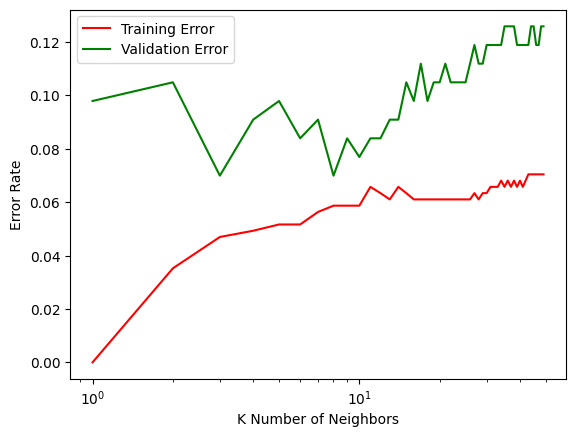

In [ ]:
K = range(1,50)

errTrain = np.zeros(len(K))
errVal = np.zeros(len(K))

for i, k in enumerate(K):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    Yhat_train = knn.predict(X_train)
    errTrain[i] = 1- accuracy_score(y_train, Yhat_train)
    Yhat_val = knn.predict(X_test)
    errVal[i] = 1- accuracy_score(y_test, Yhat_val)


plt.semilogx(K, errTrain, 'r-', label='Training Error')
plt.semilogx(K, errVal, 'g-', label='Validation Error')

plt.xlabel('K Number of Neighbors')
plt.ylabel('Error Rate')

plt.legend()
plt.show()


Class 1: Malignant 
Class 0: Benign


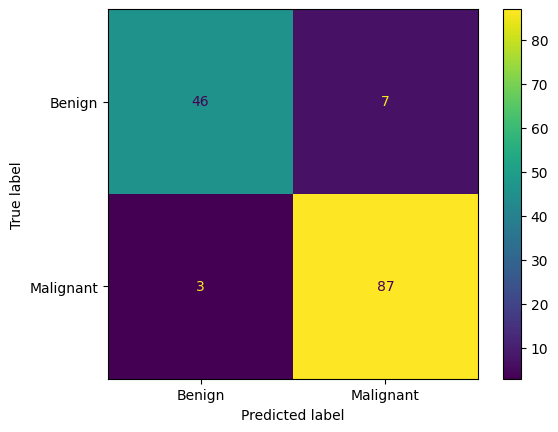

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('\nClass 1: Malignant \nClass 0: Benign')

cm = confusion_matrix(y_test, knn_tuned.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot()

In [ ]:
def overfitting_num_neighbors():

  global X_train, X_test, y_train, y_test

  k_scores = []
  for i, k in enumerate(range(1,20,2)):
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      train_score = knn.score(X_train, y_train)
      test_score = knn.score(X_test, y_test)
      k_scores.append((k, train_score, test_score))

  k_overfitting = max(k_scores, key = lambda x: x[1])
  k_best_performance = max(k_scores, key = lambda x: x[2])

  return k_overfitting, k_best_performance,
best_performance = overfitting_num_neighbors()
overfit = best_performance[0]

print(best_performance)


((1, 1.0, 0.9020979020979021), (3, 0.9530516431924883, 0.9300699300699301))


## Applying CNN


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X.shape

(569, 30)

In [ ]:
y = cancer.target
y.shape

(569,)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y)
X_train.shape , y_test.shape

((398, 30), (171,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(398,30,1)
X_test = X_test.reshape(171,30,1)

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(30, 1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv1D(32, 2, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
model = create_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 29, 16)              │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 29, 16)              │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 32)              │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          28,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,033 (117.32 KB)

 Trainable params: 29,937 (116.94 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))


Epoch 1/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.5128 - loss: 1.0757 - val_accuracy: 0.4912 - val_loss: 0.6883
Epoch 2/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6996 - loss: 0.6115 - val_accuracy: 0.8363 - val_loss: 0.6005
Epoch 3/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8246 - loss: 0.4220 - val_accuracy: 0.8889 - val_loss: 0.5278
Epoch 4/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8823 - loss: 0.3409 - val_accuracy: 0.9006 - val_loss: 0.4717
Epoch 5/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8508 - loss: 0.2824 - val_accuracy: 0.8889 - val_loss: 0.4276
Epoch 6/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8912 - loss: 0.2581 - val_accuracy: 0.8889 - val_loss: 0.3899
Epoch 7/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9437 - loss: 0.1859 - val_accuracy: 0.8889 - val_loss: 0.3586
Epoch 8/35
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9437 - loss: 0.1878 - val_accuracy: 0.8889 - v

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int).flatten()

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
acc_cnn = accuracy_score(y_test, y_pred_classes)

print("Confusion Matrix:")
print(cm)
print(acc_cnn)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Confusion Matrix:
[[ 57   7]
 [  1 106]]
0.9532163742690059


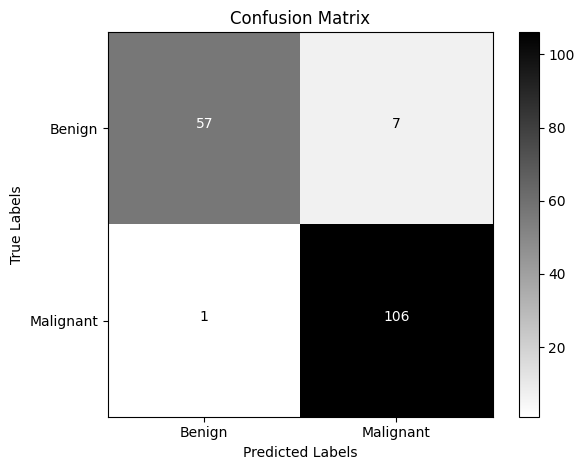

In [ ]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.imshow(cm, cmap='binary', interpolation='None')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.colorbar()

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

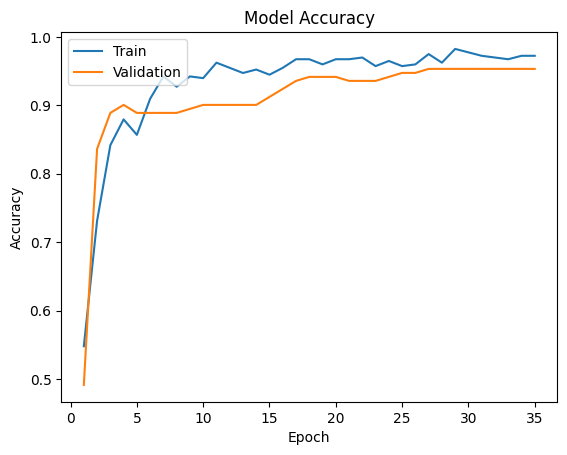

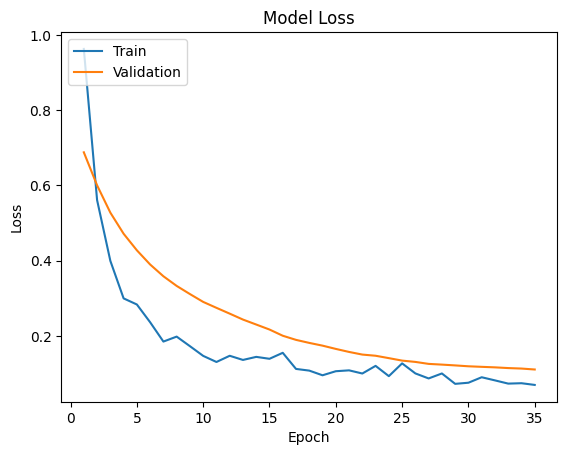

In [ ]:
plotLearningCurve(history,35)